# 9. Exercises

This notebook provides three additional blocks of exercises covering different areas. You can choose the topics you are more interested in and start with the corresponding block.

1. **Elevations in Switzerland**: We make use of **NumPy** and **Matplotlib** to analyse the elevation profile of Switzerland.
2. **Printing Patterns**: A slighlty more creative use of **loops** and **conditional statements** is considered to print particular patterns.
3. **Analysing the Tips Dataset**: We have a look at the tips dataset again and work with **Pandas** and **Seaborn**.

***
## 1. Elevations in Switzerland

In the following, you are provided with a NumPy array (stored as a ```.npy``` file in ```data```) containing data on the elevations of Switzerland, normalised to the range [0,1], and visualised below. We will make use of **NumPy** and **Matplotlib** to analyse this dataset a little bit further.

<center><img src="images/tiled_switzerland.png" alt="Tiled Switzerland" width="400"/></center>

The next cell loads the required modules, the dataset, and the maximum elevation (in meters) to rescale the normalised values.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

max_value = 4632.51

ch_tiled = np.load("data/switzerland.npy")

#### (1.1) Inspect array
Inspect the array shape (put solution in the next cell)

In [9]:
print("Shape of ch_tiled:", ch_tiled.shape)

Shape of ch_tiled: (36, 150, 200)


and an exemplary tile, e.g. tile 4 with index 3 (put solution in the next cell)

In [10]:
print(ch_tiled[3])

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.20392157 0.20392157 0.20392157]
 [       nan        nan        nan ... 0.20392157 0.20392157 0.20392157]
 [       nan        nan        nan ... 0.20392157 0.20392157 0.20392157]]


#### (1.2) Rescale values
Undo the normalisation to the [0,1] range by using ```max_value``` and store the result in ```ch_tiled```. 

Put your solution here: 

In [11]:
ch_tiled = ch_tiled * max_value

#### (1.3) Identify tile with highest elevation
Firstly, indentify the maximum value in each tile and store the result in ```max_per_tile``` such that the output looks like

```
In: print(max_per_tile)  
Out: [          nan           nan           nan 1816.67058824  944.66870588
           nan           nan 2125.50458824 2270.83823529 2234.50482353
 2706.83917647           nan 2252.67152941 2579.67223529 2924.83964706
 3560.67435294 3742.34141176 3905.84176471 2634.17235294 3215.50694118
 4360.00941176 4033.00870588 3905.84176471 3905.84176471 2652.33905882
 3815.00823529 4505.34305882 3851.34164706 3887.67505882 4251.00917647
           nan 4396.34282353 4596.17658824 2034.67105882 2688.67247059
           nan]
```

Secondly, identify the tile with the largest value, i.e. the highest elevation.

Hints:
* Make use of ```np.nanmax``` and ```np.nanargmax``` which ignore ```nan``` values to find the maximum value.
* Check out the effect of ```axis=0``` and ```axis=(1,2)``` when identifying the maximum value.

Put your solution for ```max_per_tile``` here:

In [31]:
max_per_tile = np.nanmax(ch_tiled, axis=(1,2))
print(max_per_tile)

[          nan           nan           nan 1816.67058824  944.66870588
           nan           nan 2125.50458824 2270.83823529 2234.50482353
 2706.83917647           nan 2252.67152941 2579.67223529 2924.83964706
 3560.67435294 3742.34141176 3905.84176471 2634.17235294 3215.50694118
 4360.00941176 4033.00870588 3905.84176471 3905.84176471 2652.33905882
 3815.00823529 4505.34305882 3851.34164706 3887.67505882 4251.00917647
           nan 4396.34282353 4596.17658824 2034.67105882 2688.67247059
           nan]


/var/folders/y_/2qg_gjq937z8c0xctbn85x8r0000gn/T/ipykernel_10529/3432440464.py:1: RuntimeWarning: All-NaN slice encountered
  max_per_tile = np.nanmax(ch_tiled, axis=(1,2))


Put your solution for ```max_tile_index``` here:

In [32]:
max_tile_index = np.nanargmax(max_per_tile)
print(max_tile_index)

32


#### (1.4) Which tiles are all empty?
Identify the tiles which contain only background, i.e. ```nan```. 

Hint: Make use of the functions ```np.all``` and ```np.isnan```. You might want to check out the following documentation:

In [7]:
help(np.all)

Help on _ArrayFunctionDispatcher in module numpy:

all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
    Test whether all array elements along a given axis evaluate to True.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical AND reduction is performed.
        The default (``axis=None``) is to perform a logical AND over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.
        It must have the same shape as the expected output and its
        type is preserve

In [8]:
help(np.isnan)

Help on ufunc:

isnan = <ufunc 'isnan'>
    isnan(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Test element-wise for NaN and return result as a boolean array.
    
    Parameters
    ----------
    x : array_like
        Input array.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array will retain its original value.
        Note that if an uninitialized `out` array is created via the default
   

Put your solution here:

In [35]:
np.isnan(ch_tiled)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [9]:
empty_tiles = np.all(np.isnan(ch_tiled), axis=(1,2))
print(empty_tiles)

[ True  True  True False False  True  True False False False False  True
 False False False False False False False False False False False False
 False False False False False False  True False False False False  True]


#### (1.5) Flatten array into vector
Flatten ```ch_tiled``` into a vector and store the resulting vector in ```ch_flat```.

Put your solution here:

In [36]:
ch_tiled.shape

(36, 150, 200)

In [11]:
ch_flat = ch_tiled.reshape(-1)
print(ch_flat.shape)

(1080000,)


#### (1.6) Plot histogram of the different elevation levels
Plot a histogram by making use of ```ch_flat``` and use 50 bins.

Put your solution here:

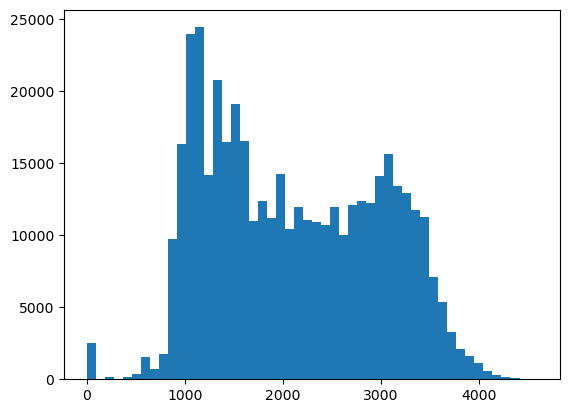

In [12]:
plt.hist(ch_flat, bins=50)
plt.show()

#### Bonus exercise (1.7): Recreate the elevation plot
As a bonus exercise, try to recreate the plot shown in the beginning of the exercise as much as possible.

Hints: Make use of ```fig, ax = plt.subplots(...)``` and ```.imshow(tile, vmin=0, vmax=max_value)```

You can put your solution here:

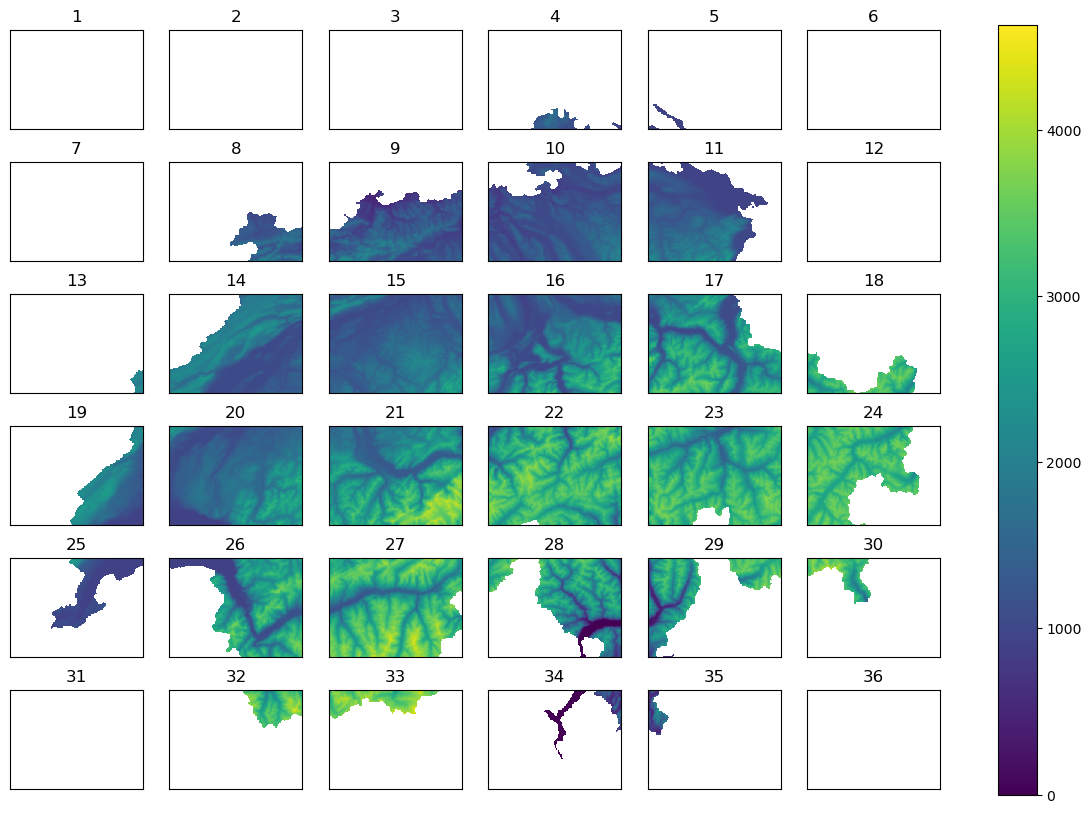

In [13]:
fig, ax = plt.subplots(6, 6, figsize=(15, 10))
ax_flat = ax.flat

for i, tile in enumerate(ch_tiled):
    im = ax_flat[i].imshow(tile, vmin=0, vmax=max_value)

    ax_flat[i].axes.get_xaxis().set_visible(False)
    ax_flat[i].axes.get_yaxis().set_visible(False)
    ax_flat[i].set_title(i+1)

fig.colorbar(im, ax=list(ax_flat))

plt.show()

***
## 2. Printing Patterns

In this exercise, we review **loops** and **conditional statements** and make a slightly 
more creative use of them to print the following patterns.

General hint: You can use ```range``` in descending order like this
```Python
for i in range(5,0,-1):
    print(i)
```

```
Out: 
5
4
3
2
1
```

#### (2.1) Print pattern
Recreate the following pattern:


```
*
**
***
****
*****
****
***
**
*

#
##
###
####
#####
####
###
##
#

x
xx
xxx
xxxx
xxxxx
xxxx
xxx
xx
x

```

Use

In [14]:
symbol = ['*','#','x']
rows = 5

and put your solution here:

In [15]:
for s in symbol:
    for i in range(0, rows):
        print(s*i)
    
    for i in range(rows, 0, -1):
        print(s*i)


*
**
***
****
*****
****
***
**
*

#
##
###
####
#####
####
###
##
#

x
xx
xxx
xxxx
xxxxx
xxxx
xxx
xx
x


#### (2.2) Print pattern

Recreate the following pattern:

```
*
**
***
****
xxxxx
****
***
**
*
```

Put your solution here:

In [16]:
for i in range(0, rows):
    print('*'*i)

for i in range(rows, 0, -1):
    if i == rows:
        print('x'*i)
    else:
        print('*'*i)


*
**
***
****
xxxxx
****
***
**
*


#### (2.3) Print pattern

Recreate the following pattern:

```
0 1 2 3 4 
1 1 2 3 4 
2 2 2 3 4 
3 3 3 3 4 
4 4 4 4 4 
```

Hint: You can use the argument ```end=' '``` in the ```print``` function
in the following way

```Python
for i in range(5):
    print(i, end=' ')
```

```
Out: 0 1 2 3 4 
```

In other words, line breaks are replaced by spaces, because

```Python
for i in range(5):
    print(i)
```

```
Out: 
0
1
2
3
4
```


Put your solution here:

In [17]:
for i in range(rows):
    for j in range(rows):
        if j <= i:
            print(i, end=' ')
        else:
            print(j, end=' ')
    print()

0 1 2 3 4 
1 1 2 3 4 
2 2 2 3 4 
3 3 3 3 4 
4 4 4 4 4 


***
## 3. Analysing the Tips Dataset

Here, we reconsider the ```tips``` dataset encountered in the ```6-Numpy_Pandas``` notebook and work with **Pandas** and **Seaborn**.

Each row corresponds to an individual visit at a restaurant, with indication of the **day** and **time** of the visit and **size** of the group, whether there were any **smoker** in the group and the **total_bill** and **tip** in dollars as well as the **sex** of the person who payed.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### (3.1) Dataset overview
Make use of ```describe()``` to get an overview of the dataset

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


and check out the additional argument ```include=['category']```.

In [21]:
tips.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


#### (3.2) Unique Categories

Identify for each column containing a categorical variable 
the unique categories. You might want to make use of ```.unique()```.

In [22]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [23]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [24]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [25]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

#### (3.3) Mean values by groups
Group by categorical variables and obtain the mean values for the
numerical variables. E.g. group by ```'day'``` and obtain the mean
values for ```'total_bill'```, ```'tip'```, ```'size'```. For this, 
check out the additional argument ```numeric_only=True```

In [26]:
tips.groupby('sex').mean(numeric_only=True)

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [27]:
tips.groupby('day').mean(numeric_only=True)

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [28]:
tips.groupby('time').mean(numeric_only=True)

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


In [29]:
tips.groupby('smoker').mean(numeric_only=True)

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


#### (3.4) Pairplot

Try to create a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(check out the documentation in the link) where you differentiate between male and female, i.e.
use ```'sex'``` to plot these aspecets in two different colours.

/Users/samarinm/anaconda3/envs/pythonCC/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


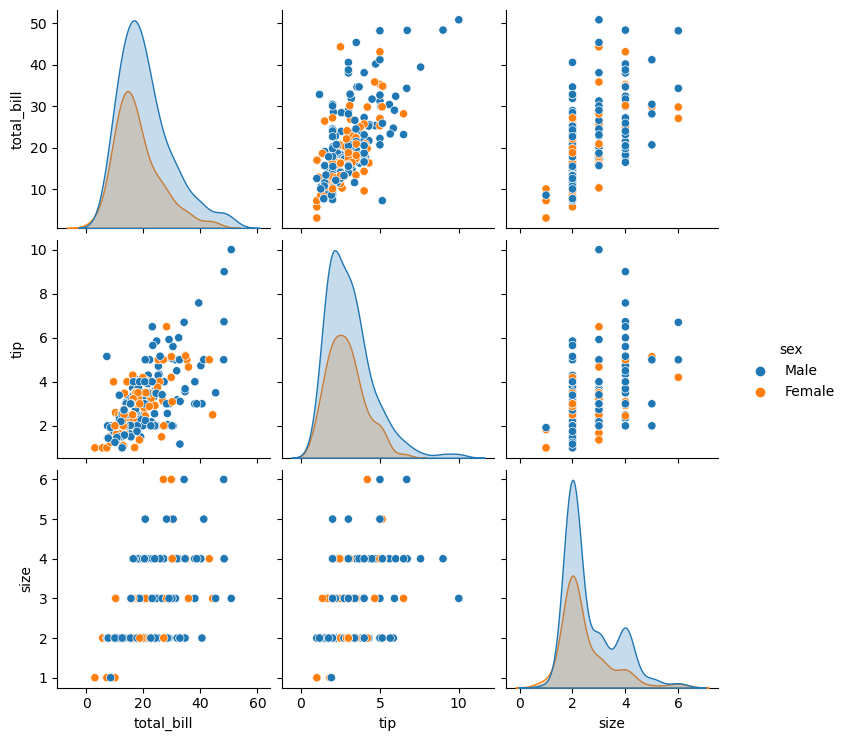

In [30]:
sns.pairplot(data=tips, hue="sex")
plt.show()

#### (3.5) Category Plots

Try to create a [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
(check out the documentation in the link), which plots the ```'size'``` on the x-axis and the **count** of different group sizes on the y-axis (i.e. a histogram) and differentiate between male and female, i.e.
use ```'sex'``` to plot these aspecets in two different colours.

/Users/samarinm/anaconda3/envs/pythonCC/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


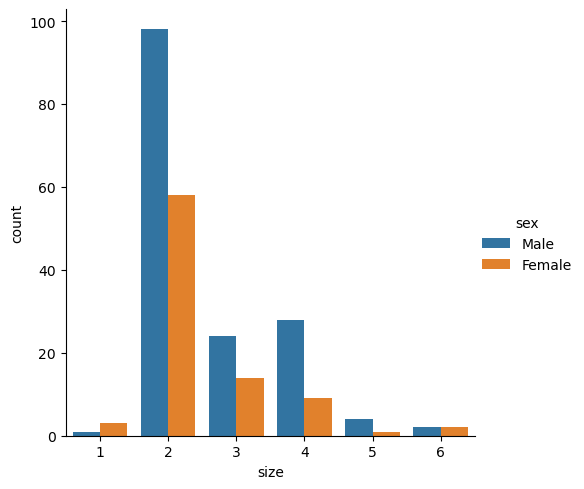

In [31]:
sns.catplot(data=tips, x="size", kind="count", hue="sex")
plt.show()

Now, try to create a [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
(check out the documentation in the link), which plots the ```'day'``` on the x-axis and the **count** of different group sizes on the y-axis (i.e. a histogram). This time create two subplots, one for female and one for male, i.e. use ```'sex'``` for the plot **columns**. 

/Users/samarinm/anaconda3/envs/pythonCC/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


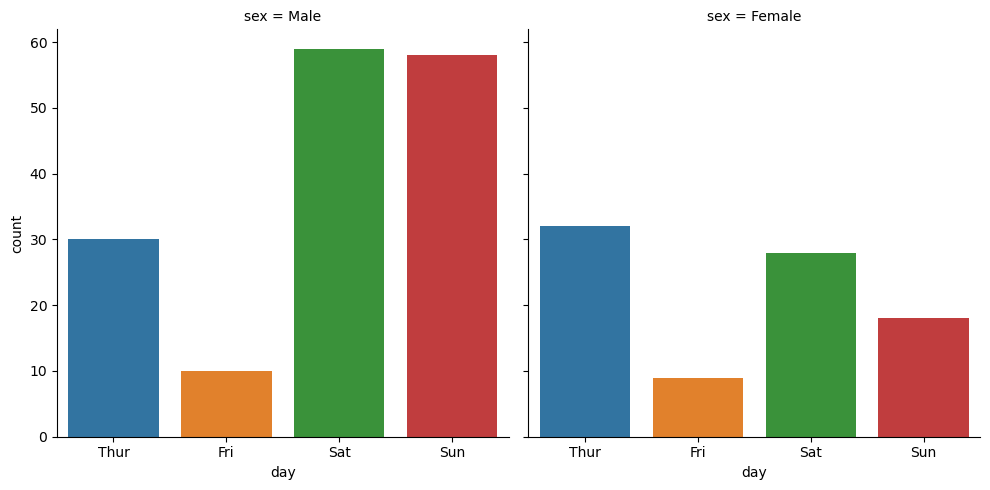

In [32]:
sns.catplot(data=tips, x="day", kind="count", col="sex")
plt.show()

#### (3.6) Correlation

In this last exercise, we compute the correlation between the numerical variables.
To this end, use the method ```corr()``` and put your solution in the following cell:

In [33]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Try to create a [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
(check out the documentation in the link), which plots the ```'total_bill'``` on the x-axis and the ```'tip'``` on the y-axis. 

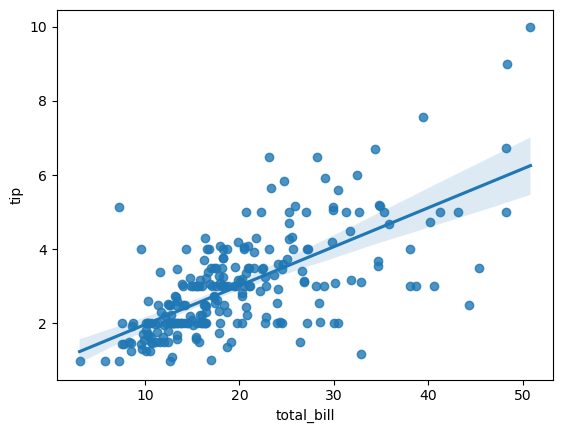

In [34]:
sns.regplot(data=tips, x="total_bill", y="tip", ci=95)
plt.show()